In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./dataset/PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [5]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [6]:
# see how many none values in pm2.5 column
data['pm2.5'].isna().sum()

2067

In [7]:
# at least the first 23 could be droped since the value is none
# other 'nones': fill them with the closest data
# here I fill them with their previous data
data = data.iloc[24:].fillna(method='ffill')

In [8]:
data['pm2.5'].isna().sum()

0

In [9]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [10]:
import datetime

In [11]:
datetime.datetime(year=2080, month=1, day=1, hour=1)

datetime.datetime(2080, 1, 1, 1, 0)

In [12]:
data['time'] = data.apply(lambda x: datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)

In [13]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,time
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [14]:
data.drop(columns=['year', 'month', 'day', 'hour', 'No'], inplace=True)

In [15]:
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,time
24,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [16]:
data.set_index('time', inplace=True)

In [17]:
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
time,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [18]:
data.cbwd.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [19]:
data = data.join(pd.get_dummies(data.cbwd))

In [20]:
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,NE,NW,SE,cv
time,,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0,0,0,1,0


In [21]:
del data['cbwd']

In [22]:
data.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
time,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


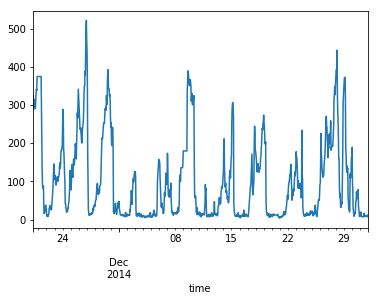

In [23]:
data['pm2.5'][-1000:].plot()

In [24]:
# use all the previous 5 days' data to predict the next day's data
src_len = 5 * 24
delay = 24
# trg_len = 24

In [25]:
data_ = []
for i in range(len(data) - src_len - delay):
    data_.append(data.iloc[i: i + src_len + delay])

In [26]:
data_[0].shape

(144, 11)

In [27]:
data_ = np.array([df.values for df in data_])

In [28]:
data_.shape

(43656, 144, 11)

In [29]:
np.random.shuffle(data_)

In [30]:
src_data = data_[:, : 5 * 24, :]
trg_data = data_[:, -1, 0] 

In [31]:
src_data.shape

(43656, 120, 11)

In [32]:
trg_data.shape

(43656,)

In [33]:
train_size = int(data_.shape[0] * 0.8)
train_data = src_data[: train_size]
train_trg = trg_data[: train_size]
test_data = src_data[train_size: ]
test_trg = trg_data[train_size: ]

In [34]:
train_data.shape, train_trg.shape

((34924, 120, 11), (34924,))

In [35]:
# data normalization
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

In [36]:
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [37]:
BATCH_SIZE = 128

In [38]:
train_data.shape[1:]

(120, 11)

In [39]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=train_data.shape[1:]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

In [40]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(train_data, train_trg, batch_size=BATCH_SIZE, epochs=50, validation_data=(test_data, test_trg))

Train on 34924 samples, validate on 8732 samples
Epoch 1/50
34924/34924 [==============================] - 2s 50us/sample - loss: 10283.1866 - mae: 72.3814 - val_loss: 7963.4033 - val_mae: 66.7586
Epoch 2/50
34924/34924 [==============================] - 1s 34us/sample - loss: 7795.5760 - mae: 65.2703 - val_loss: 7118.3940 - val_mae: 62.1217
Epoch 3/50
34924/34924 [==============================] - 1s 34us/sample - loss: 7145.5991 - mae: 62.1285 - val_loss: 6736.1798 - val_mae: 60.3670
Epoch 4/50
34924/34924 [==============================] - 1s 35us/sample - loss: 6777.9310 - mae: 60.3336 - val_loss: 6460.8976 - val_mae: 59.1029
Epoch 5/50
34924/34924 [==============================] - 1s 34us/sample - loss: 6531.7241 - mae: 59.1485 - val_loss: 6284.7983 - val_mae: 58.0526
Epoch 6/50
34924/34924 [==============================] - 1s 34us/sample - loss: 6341.5222 - mae: 58.3015 - val_loss: 6215.8117 - val_mae: 57.6667
Epoch 7/50
34924/34924 [==============================] - 1s 34us/sa

In [41]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

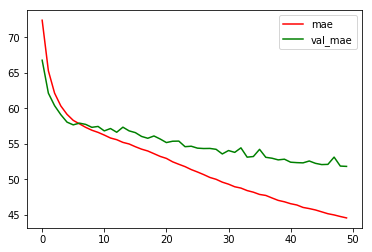

In [42]:
plt.plot(history.epoch, history.history.get('mae'), c='r', label='mae')
plt.plot(history.epoch, history.history.get('val_mae'), c='g', label='val_mae')
plt.legend()

In [43]:
# LSTM model

In [44]:
# model = keras.Sequential()
# model.add(layers.LSTM(32, input_shape=(120, 11)))
# model.add(layers.Dense(1))

In [45]:
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# history = model.fit(train_data, train_trg, batch_size=BATCH_SIZE, epochs=50, validation_data=(test_data, test_trg))

In [46]:
# plt.plot(history.epoch, history.history.get('mae'), c='r', label='mae')
# plt.plot(history.epoch, history.history.get('val_mae'), c='g', label='val_mae')
# plt.legend()

In [47]:
# double LSTM layer and optimize

In [48]:
model = keras.Sequential()
model.add(layers.LSTM(32, input_shape=(120, 11), return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))

In [49]:
lr_decay = keras.callbacks.ReduceLROnPlateau('val_loss', patience=3, factor=0.5, min_lr=0.00001)

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 120, 32)           5632      
_________________________________________________________________
lstm_2 (LSTM)                (None, 120, 32)           8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 22,305
Trainable params: 22,305
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(train_data, train_trg, batch_size=BATCH_SIZE, epochs=100, callbacks=[lr_decay], validation_data=(test_data, test_trg))

Train on 34924 samples, validate on 8732 samples
Epoch 1/100
34924/34924 [==============================] - 12s 350us/sample - loss: 16255.8949 - mae: 88.5855 - val_loss: 14245.1485 - val_mae: 80.9154
Epoch 2/100
34924/34924 [==============================] - 7s 210us/sample - loss: 14581.0799 - mae: 80.8273 - val_loss: 12959.8326 - val_mae: 75.4674
Epoch 3/100
34924/34924 [==============================] - 6s 185us/sample - loss: 13367.7686 - mae: 76.1867 - val_loss: 11898.8637 - val_mae: 71.5215
Epoch 4/100
34924/34924 [==============================] - 6s 182us/sample - loss: 12353.6272 - mae: 72.7231 - val_loss: 11015.0825 - val_mae: 68.5585
Epoch 5/100
34924/34924 [==============================] - 6s 181us/sample - loss: 11506.5885 - mae: 70.0804 - val_loss: 10284.6610 - val_mae: 66.4445
Epoch 6/100
34924/34924 [==============================] - 6s 179us/sample - loss: 10805.1667 - mae: 68.2316 - val_loss: 9686.4524 - val_mae: 65.0130
Epoch 7/100
34924/34924 [====================

34924/34924 [==============================] - 7s 190us/sample - loss: 4375.7405 - mae: 44.3677 - val_loss: 4241.9931 - val_mae: 45.1916
Epoch 56/100
34924/34924 [==============================] - 7s 188us/sample - loss: 4018.1933 - mae: 42.5702 - val_loss: 3897.9533 - val_mae: 42.7898
Epoch 57/100
34924/34924 [==============================] - 7s 191us/sample - loss: 3788.3455 - mae: 41.1562 - val_loss: 3904.8714 - val_mae: 42.4255
Epoch 58/100
34924/34924 [==============================] - 7s 188us/sample - loss: 3705.9874 - mae: 40.6489 - val_loss: 3861.8678 - val_mae: 42.2620
Epoch 59/100
34924/34924 [==============================] - 7s 189us/sample - loss: 3580.3901 - mae: 39.8731 - val_loss: 3631.1431 - val_mae: 40.5847
Epoch 60/100
34924/34924 [==============================] - 7s 188us/sample - loss: 3459.5918 - mae: 39.0658 - val_loss: 3549.8544 - val_mae: 40.3048
Epoch 61/100
34924/34924 [==============================] - 7s 193us/sample - loss: 3382.0293 - mae: 38.5930 - va

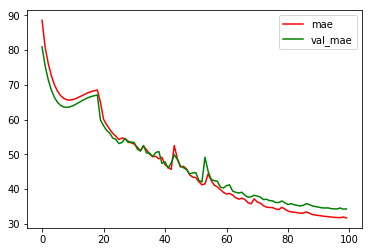

In [53]:
plt.plot(history.epoch, history.history.get('mae'), c='r', label='mae')
plt.plot(history.epoch, history.history.get('val_mae'), c='g', label='val_mae')
plt.legend()